<a href="https://colab.research.google.com/github/jgracie52/bh-2025/blob/main/Linear_Models_Lab_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

This first part imports the necessary libraries we'll use throughout the tutorial. These libraries help us create data, build models, and visualize results.

In [ ]:
# Linear Models Tutorial

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.datasets import make_classification, make_regression
from ipywidgets import interactive
%matplotlib inline

#Linear Regression

Linear regression predicts a continuous value (housing price, temperature, etc.) from a set of feature values by giving each feature a different amout of positive or negative votes toward the eventual value. So a housing price estimator might consist of two features: number of bedrooms and number of bathrooms. The function might look like this:

y = 200000*x1 + 200000*x2 + 200000 + bias    (where x1 is num_of_bedrooms and x2 is num_of_bathrooms)

If you were buying a house with no bedrooms or bathrooms then the predicted price is 200000. Because the weights associated with x1 is positive it means for every unit of x1 it is going to push the predicted house price in the positive direction. You could have a feature like num_of_ghosts in the house and it would have a weight of -100000 where for every ghost living in the house we would deduct 100k from the predicted price of the house. Adding everything up gives you your prediction for the housing price.

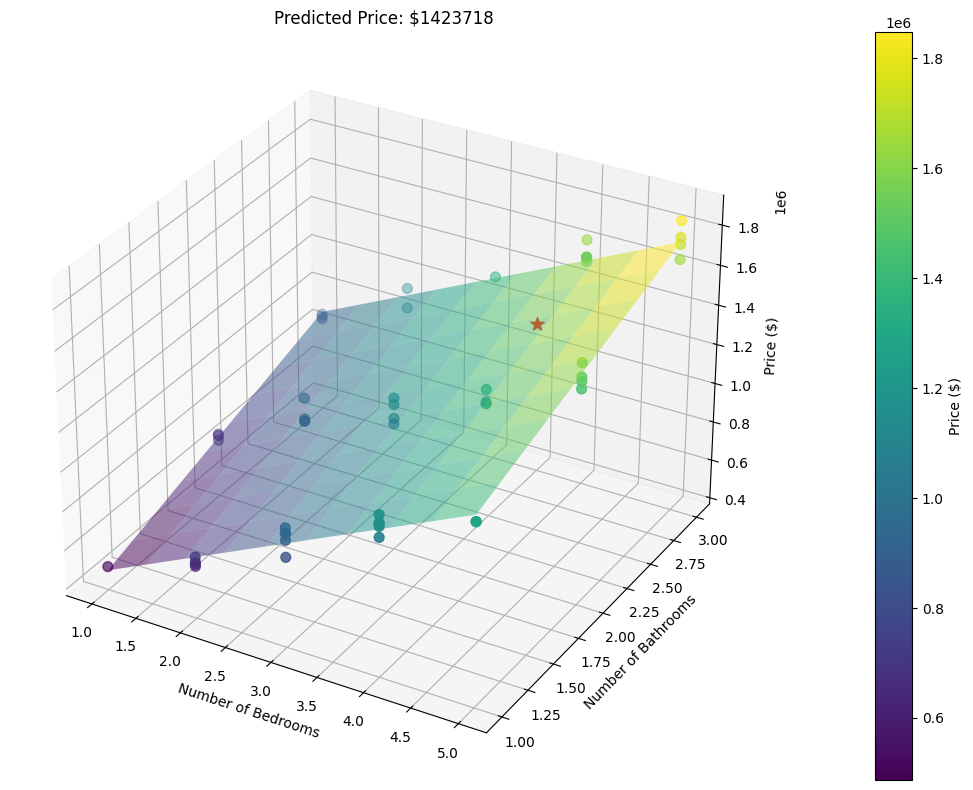

Predicted price for 4 bedrooms and 2.5 bathrooms: $1423718


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, interactive_output, FloatSlider, IntSlider, Button, VBox, HBox
from IPython.display import display, clear_output
%matplotlib inline

class LinearRegression:
    def __init__(self):
        self.w = None
        self.b = None

    def fit(self, X, y):
        X_bias = np.c_[X, np.ones(X.shape[0])]
        coeffs = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y
        self.w = coeffs[:-1]
        self.b = coeffs[-1]

    def predict(self, X):
        return X @ self.w + self.b

# Generate sample data
np.random.seed(42)
bedrooms = np.random.randint(1, 6, 50)
bathrooms = np.random.randint(1, 4, 50)
X = np.column_stack((bedrooms, bathrooms))

# Generate prices with weights close to 200,000 for both features
noise = np.random.normal(0, 50000, 50)
y = 200000 * bedrooms + 200000 * bathrooms + 100000 + noise

# Train linear regression model
model = LinearRegression()
model.fit(X, y)

print(f"Trained weights: Bedrooms: ${model.w[0]:.0f}, Bathrooms: ${model.w[1]:.0f}")
print(f"Trained bias: ${model.b:.0f}")

new_points = []

def update_plot(X, y, model, title, new_point=None):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot training data
    scatter = ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap='viridis', s=50)

    # Plot prediction plane
    x_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
    y_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
    X1, X2 = np.meshgrid(x_range, y_range)
    Z = model.predict(np.c_[X1.ravel(), X2.ravel()]).reshape(X1.shape)
    ax.plot_surface(X1, X2, Z, alpha=0.5, cmap='viridis')

    if new_point is not None:
        ax.scatter([new_point[0]], [new_point[1]], [model.predict(new_point.reshape(1, -1))],
                   color='red', s=100, marker='*')

    ax.set_xlabel('Number of Bedrooms')
    ax.set_ylabel('Number of Bathrooms')
    ax.set_zlabel('Price ($)')
    ax.set_title(title)

    fig.colorbar(scatter, label='Price ($)', pad=0.1)

    plt.tight_layout()
    plt.show()

# Plot initial state
update_plot(X, y, model, "Housing Price Predictor")

def add_point(bedrooms, bathrooms):
    global new_points, model, X, y
    new_point = np.array([bedrooms, bathrooms])
    predicted_price = model.predict(new_point.reshape(1, -1))[0]
    new_points.append(new_point)
    clear_output(wait=True)
    update_plot(X, y, model, f"Predicted Price: ${predicted_price:.0f}", new_point)
    display(ui)
    print(f"Predicted price for {bedrooms} bedrooms and {bathrooms} bathrooms: ${predicted_price:.0f}")

bedrooms_slider = IntSlider(min=1, max=6, step=1, description='Bedrooms')
bathrooms_slider = FloatSlider(min=1, max=4, step=0.5, description='Bathrooms')
add_button = Button(description="Predict Price")

add_button.on_click(lambda b: add_point(bedrooms_slider.value, bathrooms_slider.value))

ui = VBox([HBox([bedrooms_slider, bathrooms_slider]), add_button])

print("Use the sliders to set the number of bedrooms and bathrooms, then click 'Predict Price'.")
display(ui)

#Linear Classification
Linear classification is a method used to separate data into different categories using a straight line (in 2D) or a plane (in higher dimensions).

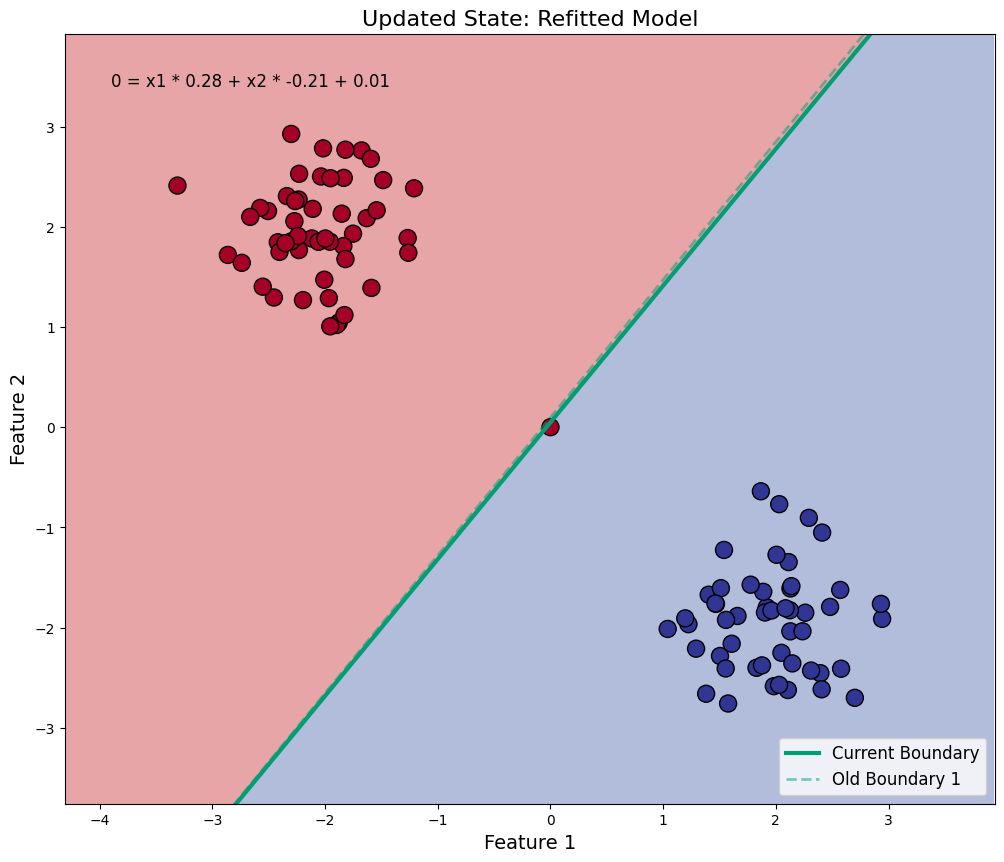

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, interactive_output, FloatSlider, IntSlider, Button, VBox, HBox
from IPython.display import display, clear_output
%matplotlib inline

from google.colab import output
output.enable_custom_widget_manager()

# Use a colorblind-friendly palette
import seaborn as sns
colors = sns.color_palette("colorblind")

class LinearClassifier:
    def __init__(self):
        self.w = None
        self.b = None

    def fit(self, X, y):
        X_bias = np.c_[X, np.ones(X.shape[0])]
        self.w = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y
        self.b = self.w[-1]
        self.w = self.w[:-1]

    def predict(self, X):
        return np.sign(X @ self.w + self.b)

# Generate sample data with clear separation
np.random.seed(42)
X1 = np.random.randn(50, 2) * 0.5 + np.array([-2, 2])
X2 = np.random.randn(50, 2) * 0.5 + np.array([2, -2])
X_full = np.vstack((X1, X2))
y_full = np.hstack((np.ones(50) * -1, np.ones(50)))

# Create a version with missing middle section
mask = (X_full[:, 0] < 0.5) & (X_full[:, 0] > -0.5)
X = X_full[~mask]
y = y_full[~mask]

# Train linear classifier on data with missing middle section
clf = LinearClassifier()
clf.fit(X, y)

new_points = []
old_boundaries = []

# Set fixed plot limits
x_min, x_max = X_full[:, 0].min() - 1, X_full[:, 0].max() + 1
y_min, y_max = X_full[:, 1].min() - 1, X_full[:, 1].max() + 1

def update_plot(X, y, model, title, show_full_data=False, new_points=None):
    global old_boundaries, x_min, x_max, y_min, y_max
    plt.figure(figsize=(12, 10))

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)

    if show_full_data:
        plt.scatter(X_full[:, 0], X_full[:, 1], c=y_full, cmap=plt.cm.RdYlBu,
                    edgecolor='black', alpha=0.2, s=100)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu,
                edgecolor='black', s=150)

    if new_points:
        new_points_array = np.array(new_points)
        plt.scatter(new_points_array[:, 0], new_points_array[:, 1],
                    c=new_points_array[:, 2], cmap=plt.cm.RdYlBu,
                    edgecolor='black', s=200, marker='*')

    plt.xlabel('Feature 1', fontsize=14)
    plt.ylabel('Feature 2', fontsize=14)
    plt.title(title, fontsize=16)

    # Plot the learned decision boundary line
    w = model.w
    b = model.b
    x_boundary = np.array([x_min, x_max])
    y_boundary = -(w[0] * x_boundary + b) / w[1]
    plt.plot(x_boundary, y_boundary, color=colors[2], linewidth=3, label='Current Boundary')

    # Plot old decision boundaries
    for i, (old_w, old_b) in enumerate(old_boundaries):
        y_old_boundary = -(old_w[0] * x_boundary + old_b) / old_w[1]
        plt.plot(x_boundary, y_old_boundary, color=colors[2], linestyle='--',
                 linewidth=2, alpha=0.5, label=f'Old Boundary {i+1}')

    # Plot the "true" decision boundary
    #plt.axvline(x=0, color=colors[3], linestyle='--', linewidth=3, label='True Boundary')

    plt.legend(fontsize=12)
    plt.text(0.05, 0.95, f'0 = x1 * {w[0]:.2f} + x2 * {w[1]:.2f} + {b:.2f}',
             transform=plt.gca().transAxes, verticalalignment='top', fontsize=12)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.show()

# Plot initial state with missing data
update_plot(X, y, clf, "Initial State: Linear Classification")

def add_point(x1, x2, label):
    global new_points, clf, X, y
    new_points.append([x1, x2, -1 if label == 0 else 1])  # Convert label to -1 or 1
    clear_output(wait=True)
    update_plot(X, y, clf, "Updated State: Added Training Data",
                show_full_data=True, new_points=new_points)
    display(ui)

def refit_model(b):
    global X, y, clf, new_points, old_boundaries
    if new_points:
        old_boundaries.append((clf.w, clf.b))
        X_new = np.vstack([X, np.array(new_points)[:, :2]])
        y_new = np.hstack([y, np.array(new_points)[:, 2]])
        clf.fit(X_new, y_new)
        X, y = X_new, y_new
        clear_output(wait=True)
        update_plot(X, y, clf, "Updated State: Refitted Model", show_full_data=True)
        display(ui)
        new_points = []

x1_slider = FloatSlider(min=-4, max=4, step=0.1, description='x1')
x2_slider = FloatSlider(min=-4, max=4, step=0.1, description='x2')
label_slider = IntSlider(min=0, max=1, step=1, description='Label')
add_button = Button(description="Add Point")
refit_button = Button(description="Refit Model")

add_button.on_click(lambda b: add_point(x1_slider.value, x2_slider.value, label_slider.value))
refit_button.on_click(refit_model)

ui = VBox([HBox([x1_slider, x2_slider, label_slider]), HBox([add_button, refit_button])])

print("Use the sliders to set coordinates and label, then click 'Add Point' to add points.")
print("Click 'Refit Model' to update the decision boundary with the new points.")
display(ui)

Add points to the chart above [red (class 0) and blue (class 1) labels] to see how the decision boundary changes (solid green line). Hit the "Refit Model" button to see how the decision boundary changes after adding points.

#Adversarial Examples with Linear Models

Adversarial Examples are input points given to a model which produce predictions which are counter to what is expected by a human. The "True Boundary" identifies the feature values that a human would use to separate the two classes. In the next exericise I want you to add points to the chart where you think the inputs could serve as adversarial examples.

##Hint: The color of the points you add will be the opposite of the background to be an adversarial sample.

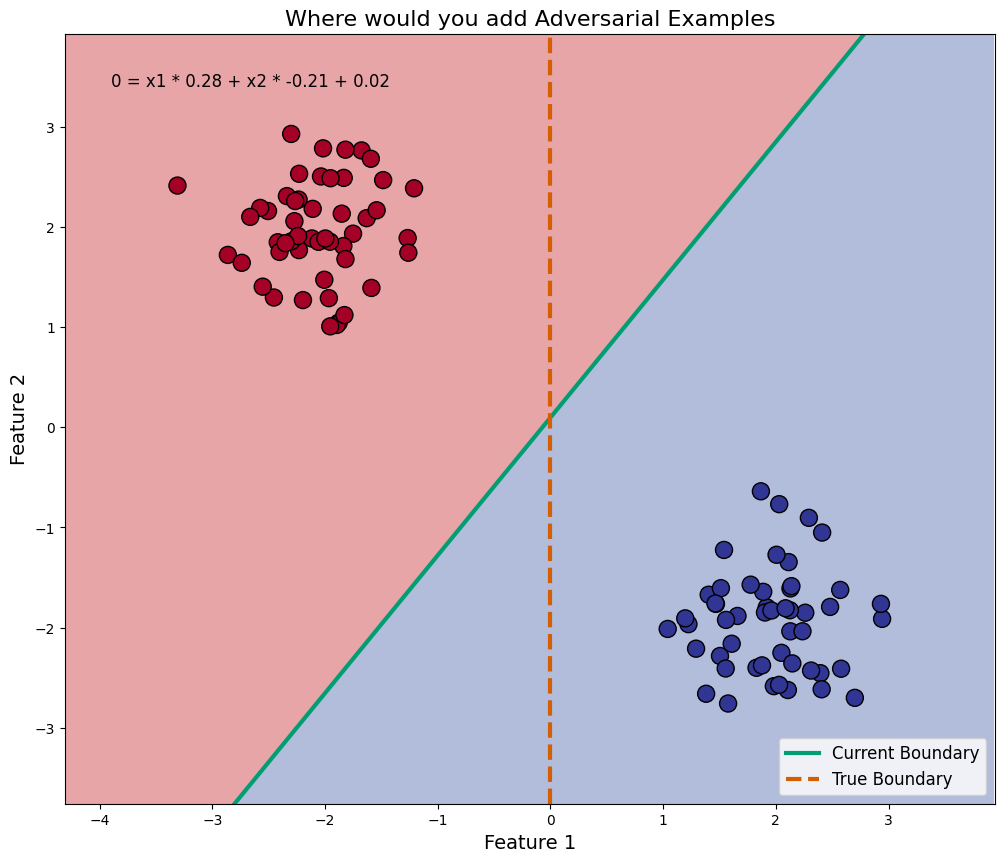

Use the sliders to set coordinates and label, then click 'Add Point' to add points.
Click 'Refit Model' to update the decision boundary with the new points.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, interactive_output, FloatSlider, IntSlider, Button, VBox, HBox
from IPython.display import display, clear_output
%matplotlib inline

# Use a colorblind-friendly palette
import seaborn as sns
colors = sns.color_palette("colorblind")

class LinearClassifier:
    def __init__(self):
        self.w = None
        self.b = None

    def fit(self, X, y):
        X_bias = np.c_[X, np.ones(X.shape[0])]
        self.w = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y
        self.b = self.w[-1]
        self.w = self.w[:-1]

    def predict(self, X):
        return np.sign(X @ self.w + self.b)

# Generate sample data with clear separation
np.random.seed(42)
X1 = np.random.randn(50, 2) * 0.5 + np.array([-2, 2])
X2 = np.random.randn(50, 2) * 0.5 + np.array([2, -2])
X_full = np.vstack((X1, X2))
y_full = np.hstack((np.ones(50) * -1, np.ones(50)))

# Create a version with missing middle section
mask = (X_full[:, 0] < 0.5) & (X_full[:, 0] > -0.5)
X = X_full[~mask]
y = y_full[~mask]

# Train linear classifier on data with missing middle section
clf = LinearClassifier()
clf.fit(X, y)

new_points = []
old_boundaries = []

# Set fixed plot limits
x_min, x_max = X_full[:, 0].min() - 1, X_full[:, 0].max() + 1
y_min, y_max = X_full[:, 1].min() - 1, X_full[:, 1].max() + 1

def update_plot(X, y, model, title, show_full_data=False, new_points=None):
    global old_boundaries, x_min, x_max, y_min, y_max
    plt.figure(figsize=(12, 10))

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)

    if show_full_data:
        plt.scatter(X_full[:, 0], X_full[:, 1], c=y_full, cmap=plt.cm.RdYlBu,
                    edgecolor='black', alpha=0.2, s=100)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu,
                edgecolor='black', s=150)

    if new_points:
        new_points_array = np.array(new_points)
        plt.scatter(new_points_array[:, 0], new_points_array[:, 1],
                    c=new_points_array[:, 2], cmap=plt.cm.RdYlBu,
                    edgecolor='black', s=200, marker='*')

    plt.xlabel('Feature 1', fontsize=14)
    plt.ylabel('Feature 2', fontsize=14)
    plt.title(title, fontsize=16)

    # Plot the learned decision boundary line
    w = model.w
    b = model.b
    x_boundary = np.array([x_min, x_max])
    y_boundary = -(w[0] * x_boundary + b) / w[1]
    plt.plot(x_boundary, y_boundary, color=colors[2], linewidth=3, label='Current Boundary')

    # Plot old decision boundaries
    for i, (old_w, old_b) in enumerate(old_boundaries):
        y_old_boundary = -(old_w[0] * x_boundary + old_b) / old_w[1]
        plt.plot(x_boundary, y_old_boundary, color=colors[2], linestyle='--',
                 linewidth=2, alpha=0.5, label=f'Old Boundary {i+1}')

    # Plot the "true" decision boundary
    plt.axvline(x=0, color=colors[3], linestyle='--', linewidth=3, label='True Boundary')

    plt.legend(fontsize=12)
    plt.text(0.05, 0.95, f'0 = x1 * {w[0]:.2f} + x2 * {w[1]:.2f} + {b:.2f}',
             transform=plt.gca().transAxes, verticalalignment='top', fontsize=12)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.show()

# Plot initial state with missing data
update_plot(X, y, clf, "Where would you add Adversarial Examples")

def add_point(x1, x2, label):
    global new_points, clf, X, y
    new_points.append([x1, x2, -1 if label == 0 else 1])  # Convert label to -1 or 1
    clear_output(wait=True)
    update_plot(X, y, clf, "Updated State: Added Training Data",
                show_full_data=True, new_points=new_points)
    display(ui)

def refit_model(b):
    global X, y, clf, new_points, old_boundaries
    if new_points:
        old_boundaries.append((clf.w, clf.b))
        X_new = np.vstack([X, np.array(new_points)[:, :2]])
        y_new = np.hstack([y, np.array(new_points)[:, 2]])
        clf.fit(X_new, y_new)
        X, y = X_new, y_new
        clear_output(wait=True)
        update_plot(X, y, clf, "Updated State: Refitted Model", show_full_data=True)
        display(ui)
        new_points = []

x1_slider = FloatSlider(min=-4, max=4, step=0.1, description='x1')
x2_slider = FloatSlider(min=-4, max=4, step=0.1, description='x2')
label_slider = IntSlider(min=0, max=1, step=1, description='Label')
add_button = Button(description="Add Point")
refit_button = Button(description="Refit Model")

add_button.on_click(lambda b: add_point(x1_slider.value, x2_slider.value, label_slider.value))
refit_button.on_click(refit_model)

ui = VBox([HBox([x1_slider, x2_slider, label_slider]), HBox([add_button, refit_button])])

print("Use the sliders to set coordinates and label, then click 'Add Point' to add points.")
print("Click 'Refit Model' to update the decision boundary with the new points.")
display(ui)

Remember that Adversarial Examples occur when the input feature values cause the predictions of the models to not match the actual label that the input values represent (ie picture of a cat with the prediction as guacomole). The background color indicates  what the model will predict. The left side of the dotted line should be classified as red. The right side of the dotted line should be classified as blue. What does that mean about the pink and light blue triangles.

#Data Poisoning

With Data Poisoning an attacker provides training data to the model to change the decision boundary to their desired orientation.

DATA POISONING ATTACK DEMONSTRATION

📊 STEP 1: Creating a clean dataset...
--------------------------------------------------
✓ Generated 100 clean data points
✓ True relationship: y = 4 + 3x + noise
✓ Training set: 80 samples
✓ Test set: 20 samples

🤖 STEP 2: Training model on clean data...
--------------------------------------------------
✓ Clean Model Learned: y = 4.143 + 2.799x
✓ Test MSE: 0.6537
✓ Test R²: 0.8072 (higher is better, max=1.0)

🎯 STEP 3: Crafting malicious data points...
--------------------------------------------------
✓ Poisoned points created:
  Point 1: X=0.1, Y=15.0 (deviation: +10.7 from expected)
  Point 2: X=0.2, Y=16.0 (deviation: +11.4 from expected)
  Point 3: X=1.9, Y=-2.0 (deviation: -11.7 from expected)

⚠️  Poison percentage: 3.6% of training data

💉 STEP 4: Injecting poison into training data...
--------------------------------------------------
✓ Original training size: 80 samples
✓ Poisoned training size: 83 samples

📈 STEP 5: Measuring attack imp

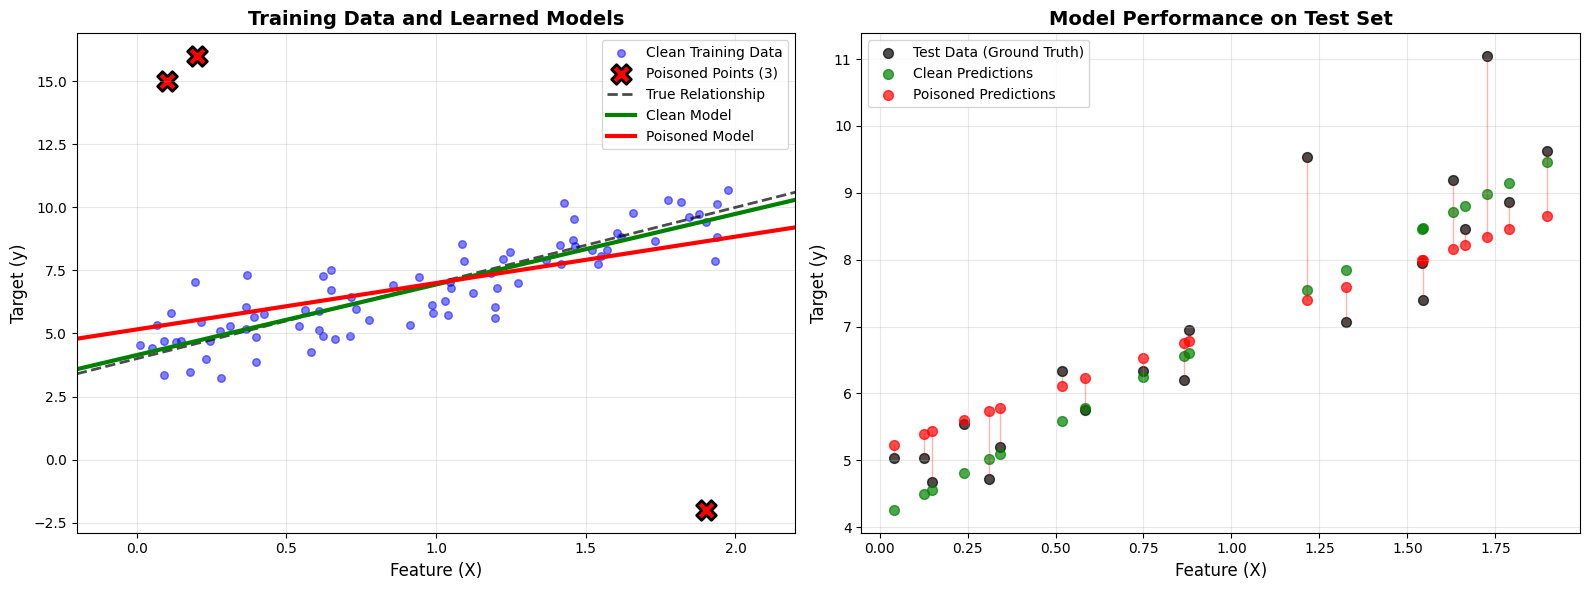


📝 KEY INSIGHTS:
1. With just 3 malicious points (3.6% of data),
   the attacker degraded model performance by 34.3%

2. The poisoned points acted as 'leverage points' - outliers that
   have high influence on the regression line

3. Linear models are particularly vulnerable because they try to
   minimize error across ALL points, including malicious ones

4. This attack is stealthy - the poisoned model still looks reasonable
   but makes systematically worse predictions


In [ ]:
"""
Data Poisoning Attack on Linear Regression - Educational Demo
===========================================================

This demonstration shows how an attacker can manipulate a machine learning model
by injecting carefully crafted malicious data points into the training dataset.
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Set random seed for reproducibility
np.random.seed(42)

print("=" * 70)
print("DATA POISONING ATTACK DEMONSTRATION")
print("=" * 70)

# ============================================================================
# STEP 1: Generate Clean Dataset
# ============================================================================
print("\n📊 STEP 1: Creating a clean dataset...")
print("-" * 50)

# Generate 100 data points following the relationship: y = 4 + 3x + noise
n_samples = 100
X = 2 * np.random.rand(n_samples, 1)  # Features between 0 and 2
true_intercept = 4
true_slope = 3
noise = np.random.randn(n_samples, 1)
y = true_intercept + true_slope * X + noise

print(f"✓ Generated {n_samples} clean data points")
print(f"✓ True relationship: y = {true_intercept} + {true_slope}x + noise")

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"✓ Training set: {len(X_train)} samples")
print(f"✓ Test set: {len(X_test)} samples")

# ============================================================================
# STEP 2: Train Model on Clean Data
# ============================================================================
print("\n🤖 STEP 2: Training model on clean data...")
print("-" * 50)

clean_model = LinearRegression()
clean_model.fit(X_train, y_train)
y_pred_clean = clean_model.predict(X_test)

# Calculate performance metrics
mse_clean = mean_squared_error(y_test, y_pred_clean)
r2_clean = r2_score(y_test, y_pred_clean)

print(f"✓ Clean Model Learned: y = {clean_model.intercept_[0]:.3f} + {clean_model.coef_[0][0]:.3f}x")
print(f"✓ Test MSE: {mse_clean:.4f}")
print(f"✓ Test R²: {r2_clean:.4f} (higher is better, max=1.0)")

# ============================================================================
# STEP 3: Craft Poisoned Data Points
# ============================================================================
print("\n🎯 STEP 3: Crafting malicious data points...")
print("-" * 50)

# Create poisoned points: outliers designed to shift the regression line
# Strategy: Place points far from the true relationship
X_poison = np.array([[0.1], [0.2], [1.9]])
y_poison = np.array([[15.0], [16.0], [-2.0]])

print("✓ Poisoned points created:")
for i, (xp, yp) in enumerate(zip(X_poison, y_poison)):
    expected_y = true_intercept + true_slope * xp[0]
    deviation = yp[0] - expected_y
    print(f"  Point {i+1}: X={xp[0]:.1f}, Y={yp[0]:.1f} (deviation: {deviation:+.1f} from expected)")

# Calculate percentage of poisoned data
poison_percentage = len(X_poison) / (len(X_train) + len(X_poison)) * 100
print(f"\n⚠️  Poison percentage: {poison_percentage:.1f}% of training data")

# ============================================================================
# STEP 4: Inject Poison and Retrain
# ============================================================================
print("\n💉 STEP 4: Injecting poison into training data...")
print("-" * 50)

# Combine clean training data with poisoned points
X_train_poisoned = np.vstack([X_train, X_poison])
y_train_poisoned = np.vstack([y_train, y_poison])

print(f"✓ Original training size: {len(X_train)} samples")
print(f"✓ Poisoned training size: {len(X_train_poisoned)} samples")

# Train new model on poisoned data
poisoned_model = LinearRegression()
poisoned_model.fit(X_train_poisoned, y_train_poisoned)
y_pred_poisoned = poisoned_model.predict(X_test)

# ============================================================================
# STEP 5: Evaluate Attack Impact
# ============================================================================
print("\n📈 STEP 5: Measuring attack impact...")
print("-" * 50)

# Calculate poisoned model metrics
mse_poisoned = mean_squared_error(y_test, y_pred_poisoned)
r2_poisoned = r2_score(y_test, y_pred_poisoned)

print(f"✓ Poisoned Model: y = {poisoned_model.intercept_[0]:.3f} + {poisoned_model.coef_[0][0]:.3f}x")
print(f"✓ Test MSE: {mse_poisoned:.4f}")
print(f"✓ Test R²: {r2_poisoned:.4f}")

# Calculate degradation
mse_increase = ((mse_poisoned - mse_clean) / mse_clean) * 100
r2_decrease = ((r2_clean - r2_poisoned) / r2_clean) * 100

print("\n🔴 ATTACK IMPACT:")
print(f"  • MSE increased by {mse_increase:.1f}%")
print(f"  • R² decreased by {r2_decrease:.1f}%")
print(f"  • Slope changed from {clean_model.coef_[0][0]:.3f} to {poisoned_model.coef_[0][0]:.3f}")
print(f"  • Intercept changed from {clean_model.intercept_[0]:.3f} to {poisoned_model.intercept_[0]:.3f}")

# ============================================================================
# STEP 6: Visualize the Attack
# ============================================================================
print("\n🎨 STEP 6: Creating visualization...")
print("-" * 50)

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Training data and models
ax1.scatter(X_train, y_train, color='blue', alpha=0.5, label='Clean Training Data', s=30)
ax1.scatter(X_poison, y_poison, color='red', s=200, edgecolor='black',
            linewidth=2, label=f'Poisoned Points ({len(X_poison)})', marker='X')

# Create extended range for plotting lines
X_plot = np.linspace(-0.2, 2.2, 100).reshape(-1, 1)
y_clean_line = clean_model.predict(X_plot)
y_poisoned_line = poisoned_model.predict(X_plot)
y_true_line = true_intercept + true_slope * X_plot

ax1.plot(X_plot, y_true_line, 'k--', linewidth=2, label='True Relationship', alpha=0.7)
ax1.plot(X_plot, y_clean_line, 'green', linewidth=3, label='Clean Model')
ax1.plot(X_plot, y_poisoned_line, 'red', linewidth=3, label='Poisoned Model')

ax1.set_xlabel('Feature (X)', fontsize=12)
ax1.set_ylabel('Target (y)', fontsize=12)
ax1.set_title('Training Data and Learned Models', fontsize=14, fontweight='bold')
ax1.legend(loc='best')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-0.2, 2.2)

# Right plot: Test set predictions
ax2.scatter(X_test, y_test, color='black', alpha=0.7, label='Test Data (Ground Truth)', s=50)
ax2.scatter(X_test, y_pred_clean, color='green', alpha=0.7, label='Clean Predictions', s=50)
ax2.scatter(X_test, y_pred_poisoned, color='red', alpha=0.7, label='Poisoned Predictions', s=50)

# Draw error bars
for i in range(len(X_test)):
    ax2.plot([X_test[i], X_test[i]], [y_test[i], y_pred_poisoned[i]],
             'r-', alpha=0.3, linewidth=1)

ax2.set_xlabel('Feature (X)', fontsize=12)
ax2.set_ylabel('Target (y)', fontsize=12)
ax2.set_title('Model Performance on Test Set', fontsize=14, fontweight='bold')
ax2.legend(loc='best')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# Summary and Insights
# ============================================================================
print("\n📝 KEY INSIGHTS:")
print("=" * 70)
print(f"1. With just {len(X_poison)} malicious points ({poison_percentage:.1f}% of data),")
print(f"   the attacker degraded model performance by {mse_increase:.1f}%")
print("\n2. The poisoned points acted as 'leverage points' - outliers that")
print("   have high influence on the regression line")
print("\n3. Linear models are particularly vulnerable because they try to")
print("   minimize error across ALL points, including malicious ones")
print("\n4. This attack is stealthy - the poisoned model still looks reasonable")
print("   but makes systematically worse predictions")
print("=" * 70)

# Model Inversion

Model Inversion takes place when the attacker would like to determine what the input is for a known output label.

With linear models there are only two labels.

## What is a way that an attacker could figure out the valid inputs for a known label?

Model Inversion is a bit hard because of the coarse granularity of linear models. What do you think?

#Model Inference (Special case of Model Stealing)

Is there anything we can learn from the behavior of the model to determine any characteristics of the models such as the hyperparameter values, number of layers, if they are using Dropout, etc.

With linear models you can to learn the weights. If you learn the weights of the linear model then you can steal the model

It may be difficult to learn the exact weight values for linear classification but it is possible for linear regression.

Think about the housing price predictor.

##How can you use targeted input values to determine the value of the weights in the formula:

predicted_price = 200000x1 + 200000x2 + 200000

Another way of writing the formula above is:

predicted_price = w1 * x1 + w2 * x2 + bias

We want to learn w1, w2 and bias.

We can give the model x1 and x2 as the number of bedrooms and number of bathrooms

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, widgets, Button, VBox, HBox, Output, Layout, HTMLMath
from IPython.display import display, clear_output, HTML
import random

class LinearModel:
    def __init__(self, w1=None, w2=None, b=None):
        """Initialize a linear model with optional parameters."""
        if w1 is None:
            # Random weights if not specified
            self.w1 = random.randint(150000, 250000)
            self.w2 = random.randint(100000, 200000)
            self.b = random.randint(25000, 75000)
        else:
            self.w1 = w1
            self.w2 = w2
            self.b = b

    def predict(self, X):
        """Predict outputs based on input features."""
        return X[:, 0] * self.w1 + X[:, 1] * self.w2 + self.b

# Create the "unknown" model with random parameters
true_model = LinearModel()


# Function to query the model
def query_model(bedrooms, bathrooms):
    """Query the model with given inputs and return prediction."""
    X = np.array([[bedrooms, bathrooms]])
    return true_model.predict(X)[0]

# Create widget layout
wide_layout = Layout(width='300px')
row_layout = Layout(display='flex', flex_flow='row', justify_content='space-between')

# Create widgets
bedrooms_slider = widgets.FloatSlider(
    value=0, min=0, max=5, step=1, description="Bedrooms:",
    layout=wide_layout, readout_format='.0f'
)
bathrooms_slider = widgets.FloatSlider(
    value=0, min=0, max=5, step=1, description="Bathrooms:",
    layout=wide_layout, readout_format='.0f'
)
query_button = Button(description="Query Model")
reset_button = Button(description="Reset", button_style='danger')

# Create output areas
query_output = Output()
inference_output = Output()
plot_output = Output()

# Initialize inference state
inference_state = {
    'step': 0,
    'bias': None,
    'w1': None,
    'w2': None,
    'queries': []
}

# Create titles and descriptions for each step
step_titles = [
    "Step 1: Find the Bias",
    "Step 2: Find Weight for Bathrooms (w2)",
    "Step 3: Find Weight for Bedrooms (w1)",
    "Step 4: Verify the Model"
]

step_instructions = [
    "Set both Bedrooms and Bathrooms to 0 and query the model to find the bias.",
    "Set Bedrooms to 0 and Bathrooms to 1, then query the model to find w2.",
    "Set Bedrooms to 1 and Bathrooms to 0, then query the model to find w1.",
    "Try different inputs to verify your reverse-engineered model matches the true model."
]

# Status displays
status_html = widgets.HTML(value="<h3>Model Inference Progress</h3>")
step_display = widgets.HTML(value=f"<h4>{step_titles[0]}</h4><p>{step_instructions[0]}</p>")
current_inference = widgets.HTML(value="<p>Current inference: Price = ? * bedrooms + ? * bathrooms + ?</p>")

# Function to update the plot
def update_plot():
    with plot_output:
        clear_output(wait=True)

        # Create plot showing queries and predicted values
        fig, ax = plt.subplots(figsize=(10, 6))

        # Create a meshgrid of points
        x = np.linspace(0, 5, 6)
        y = np.linspace(0, 5, 6)
        X, Y = np.meshgrid(x, y)

        # If we have inferred parameters, show the inferred model
        if inference_state['bias'] is not None:
            if inference_state['w1'] is not None and inference_state['w2'] is not None:
                # Full model is known
                Z = inference_state['w1'] * X + inference_state['w2'] * Y + inference_state['bias']
                ax.plot_surface = plt.cm.jet
                cs = ax.contour(X, Y, Z, cmap='viridis', alpha=0.7)
                plt.clabel(cs, inline=1, fontsize=10)

        # Plot the query points
        queries = inference_state['queries']
        if queries:
            points_x = [q[0] for q in queries]
            points_y = [q[1] for q in queries]
            points_z = [q[2] for q in queries]

            sc = ax.scatter(points_x, points_y, c=points_z, cmap='viridis',
                          s=100, edgecolor='black', zorder=5)
            plt.colorbar(sc, label='Price ($)')

            # Add labels to points
            for i, (x, y, z) in enumerate(queries):
                ax.annotate(f"${z:.0f}", (x, y), fontsize=9,
                          xytext=(5, 5), textcoords='offset points')

        ax.set_xlabel('Bedrooms')
        ax.set_ylabel('Bathrooms')
        ax.set_xlim(-0.5, 5.5)
        ax.set_ylim(-0.5, 5.5)
        ax.set_title('Housing Price Model Visualization')
        ax.grid(True)

        plt.tight_layout()
        plt.show()

# Function to handle queries
def on_query_button_clicked(b):
    bedrooms = bedrooms_slider.value
    bathrooms = bathrooms_slider.value
    price = query_model(bedrooms, bathrooms)

    # Store the query
    inference_state['queries'].append((bedrooms, bathrooms, price))

    # Update the query output
    with query_output:
        clear_output(wait=True)
        print(f"Query: {bedrooms} bedrooms, {bathrooms} bathrooms")
        print(f"Predicted price: ${price:.2f}")

    # Update inference based on the step
    update_inference(bedrooms, bathrooms, price)

    # Update the plot
    update_plot()

# Function to update inference based on queries
def update_inference(bedrooms, bathrooms, price):
    step = inference_state['step']

    # Step 1: Find bias (when both inputs are 0)
    if step == 0 and bedrooms == 0 and bathrooms == 0:
        inference_state['bias'] = price
        inference_state['step'] = 1

        with inference_output:
            clear_output(wait=True)
            print(f"Bias inferred: ${inference_state['bias']:.2f}")
            print("This is the base price when both inputs are 0.")
            print("\nNext, find the weight for bathrooms (w2).")

        # Update status displays
        step_display.value = f"<h4>{step_titles[1]}</h4><p>{step_instructions[1]}</p>"
        current_inference.value = f"<p>Current inference: Price = ? * bedrooms + ? * bathrooms + ${inference_state['bias']:.2f}</p>"

    # Step 2: Find w2 (when bedrooms=0, bathrooms=1)
    elif step == 1 and bedrooms == 0 and bathrooms == 1:
        inference_state['w2'] = price - inference_state['bias']
        inference_state['step'] = 2

        with inference_output:
            clear_output(wait=True)
            print(f"Weight for bathrooms (w2) inferred: ${inference_state['w2']:.2f}")
            print("When bedrooms=0 and bathrooms=1:")
            print(f"${price:.2f} = 0 * w1 + 1 * w2 + ${inference_state['bias']:.2f}")
            print(f"w2 = ${price:.2f} - ${inference_state['bias']:.2f} = ${inference_state['w2']:.2f}")
            print("\nNext, find the weight for bedrooms (w1).")

        # Update status displays
        step_display.value = f"<h4>{step_titles[2]}</h4><p>{step_instructions[2]}</p>"
        current_inference.value = f"<p>Current inference: Price = ? * bedrooms + ${inference_state['w2']:.2f} * bathrooms + ${inference_state['bias']:.2f}</p>"

    # Step 3: Find w1 (when bedrooms=1, bathrooms=0)
    elif step == 2 and bedrooms == 1 and bathrooms == 0:
        inference_state['w1'] = price - inference_state['bias']
        inference_state['step'] = 3

        with inference_output:
            clear_output(wait=True)
            print(f"Weight for bedrooms (w1) inferred: ${inference_state['w1']:.2f}")
            print("When bedrooms=1 and bathrooms=0:")
            print(f"${price:.2f} = 1 * w1 + 0 * w2 + ${inference_state['bias']:.2f}")
            print(f"w1 = ${price:.2f} - ${inference_state['bias']:.2f} = ${inference_state['w1']:.2f}")
            print("\nModel fully reverse-engineered!")
            print(f"Price = ${inference_state['w1']:.2f} * bedrooms + ${inference_state['w2']:.2f} * bathrooms + ${inference_state['bias']:.2f}")

            print("\nTrue model:")
            print(f"Price = ${true_model.w1:.2f} * bedrooms + ${true_model.w2:.2f} * bathrooms + ${true_model.b:.2f}")

        # Update status displays
        step_display.value = f"<h4>{step_titles[3]}</h4><p>{step_instructions[3]}</p>"
        current_inference.value = f"<p>Final inference: Price = ${inference_state['w1']:.2f} * bedrooms + ${inference_state['w2']:.2f} * bathrooms + ${inference_state['bias']:.2f}</p>"

    # Step 4: Verification with other inputs
    elif step == 3:
        # Calculate predicted price using our inferred model
        inferred_price = inference_state['w1'] * bedrooms + inference_state['w2'] * bathrooms + inference_state['bias']

        with inference_output:
            clear_output(wait=True)
            print(f"True model price: ${price:.2f}")
            print(f"Your inferred model price: ${inferred_price:.2f}")
            print(f"Difference: ${price - inferred_price:.2f}")

            if abs(price - inferred_price) < 0.01:
                print("\nYour inferred model matches the true model perfectly!")
            else:
                print("\nThere's a small difference due to floating-point precision.")

            print("\nComparing models:")
            print(f"Your model: Price = ${inference_state['w1']:.2f} * bedrooms + ${inference_state['w2']:.2f} * bathrooms + ${inference_state['bias']:.2f}")
            print(f"True model: Price = ${true_model.w1:.2f} * bedrooms + ${true_model.w2:.2f} * bathrooms + ${true_model.b:.2f}")

# Function to reset
def on_reset_button_clicked(b):
    # Reset inference state
    inference_state['step'] = 0
    inference_state['bias'] = None
    inference_state['w1'] = None
    inference_state['w2'] = None
    inference_state['queries'] = []

    # Reset sliders
    bedrooms_slider.value = 0
    bathrooms_slider.value = 0

    # Clear outputs
    with query_output:
        clear_output(wait=True)

    with inference_output:
        clear_output(wait=True)

    with plot_output:
        clear_output(wait=True)

    # Reset status displays
    step_display.value = f"<h4>{step_titles[0]}</h4><p>{step_instructions[0]}</p>"
    current_inference.value = "<p>Current inference: Price = ? * bedrooms + ? * bathrooms + ?</p>"

# Connect buttons to functions
query_button.on_click(on_query_button_clicked)
reset_button.on_click(on_reset_button_clicked)

# Create main UI
ui = VBox([
    status_html,
    step_display,
    current_inference,
    HBox([
        VBox([
            bedrooms_slider,
            bathrooms_slider,
            HBox([query_button, reset_button])
        ]),
        query_output
    ]),
    inference_output,
    plot_output
])

print("## Model Inference: Reverse Engineering a Linear Model")
print("Follow the steps below to learn how to reverse engineer a linear model's parameters.")
print("#" * 80)
print("The linear model has the form: Price = w1 * bedrooms + w2 * bathrooms + bias")
print("#" * 80)
print("Your goal is to figure out the values of w1, w2, and bias by querying the model with specific inputs.\n")

display(ui)

## Model Inference: Reverse Engineering a Linear Model
Follow the steps below to learn how to reverse engineer a linear model's parameters.
################################################################################
The linear model has the form: Price = w1 * bedrooms + w2 * bathrooms + bias
################################################################################
Your goal is to figure out the values of w1, w2, and bias by querying the model with specific inputs.



# Training Dataset Leakage

Are there any signs that the inputs provided to the model were part of the training set. One way to identify the use of trainging data as inputs to the model is when output confidence scores are significantly higher for input values when providing training data as input to the model?

Look at the first two plots.

You provide inputs and it either tells you that the output is one class or another.

With linear regression the output is a housing price. Is there a way that the model can leak the training data?


Sample of our 'training' data:
   Size (sq ft)  Bedrooms   Price
0          2382         1  387495
1          1700         5  435191
2          1989         4  392471
3          2620         4  507245
4          2433         2  415608

Model coefficients:
Price = $95774 + $101.59 * Size + $25318 * Bedrooms

Predicted price for a 1500 sq ft house with 3 bedrooms: $324111
But we can't know if this exact house was in the original dataset.


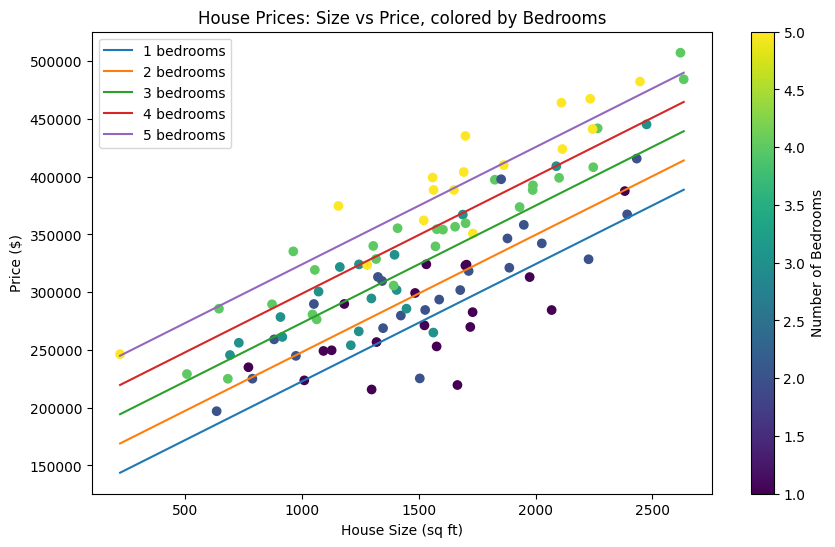

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Generate some realistic house data
np.random.seed(0)
n_houses = 100
size = np.random.normal(1500, 500, n_houses).astype(int)  # house sizes in sq ft
bedrooms = np.random.randint(1, 6, n_houses)  # number of bedrooms
price = 100000 + 100 * size + 25000 * bedrooms + np.random.normal(0, 25000, n_houses)

# Create a dataframe for easier viewing
df = pd.DataFrame({
    'Size (sq ft)': size,
    'Bedrooms': bedrooms,
    'Price': price.astype(int)
})

print("Sample of our 'training' data:")
print(df.head())

# Train a linear model
model = LinearRegression()
X = df[['Size (sq ft)', 'Bedrooms']]
y = df['Price']
model.fit(X, y)

print("\nModel coefficients:")
print(f"Price = ${model.intercept_:.0f} + ${model.coef_[0]:.2f} * Size + ${model.coef_[1]:.0f} * Bedrooms")

# Try to "recover" a data point
query_size = 1500
query_bedrooms = 3
query_df = pd.DataFrame({'Size (sq ft)': [query_size], 'Bedrooms': [query_bedrooms]})
predicted_price = model.predict(query_df)[0]

print(f"\nPredicted price for a {query_size} sq ft house with {query_bedrooms} bedrooms: ${predicted_price:.0f}")
print("But we can't know if this exact house was in the original dataset.")

# Visualize the data and model
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Size (sq ft)'], df['Price'], c=df['Bedrooms'], cmap='viridis')
plt.colorbar(scatter, label='Number of Bedrooms')

sizes = np.linspace(df['Size (sq ft)'].min(), df['Size (sq ft)'].max(), 100)
for bedrooms in range(1, 6):
    prices_df = pd.DataFrame({'Size (sq ft)': sizes, 'Bedrooms': np.full(100, bedrooms)})
    prices = model.predict(prices_df)
    plt.plot(sizes, prices, label=f'{bedrooms} bedrooms')

plt.xlabel('House Size (sq ft)')
plt.ylabel('Price ($)')
plt.title('House Prices: Size vs Price, colored by Bedrooms')
plt.legend()
plt.show()

You can use a linear model to get predictions but there is no direct indicator (like a confidence value) which can differentiate the different predictions.